## Cristina Priolo

## SBA23037

## Github link: https://github.com/Sba23037/CristinaPriolo_DVizHDip_CA1.git


--------------------------------------------------------------------------------------------------------
--------------------------------------------------------------------------------------------------------

# Introduction: 

--------------------------------------------------------------------------------------------------------
--------------------------------------------------------------------------------------------------------

In the domain of the retail company of videogames the dataset "vgsales" is going to be analized to determinate sales strategy for the coming winter season. In the following notebook, it will be covered the following aspects:

- **Analyzing the dataset**
-  **EDA:**

&rarr; Checking the dataset in its whole:
> - *type of variables*
> 
> - *Duplicates*
> 
> - *Missing Varirysis
  d the discoveries of the analysision.**
   

 &rarr; Handling the missing variables
- **Part 1:** Answering question to have a better overview of the domain of videogames
  >- What are the top 5 games by global sales?  
  >- 	Is there a correlation between the “na_sales” and “jp_sales” for the years 2010-2014?
  >- What is the distribution of the most popular 4 game genres?   
  >- Do older games (2005 and earlier) have a higher MEAN “eu_sales” than newer games (after 2005)?
  >- What are the 3 most common “developer” in the dataset?
	

- **Part 2:** Exploring statistical relevant question on the dataset:

  >- Does some genre have better sales in a specific region?
  >- From where was the most amount of sales? EU_Sales? NA_Sales or JP_Sales on Global Sales?
  >- What is the distribution of age rating into the global sales?
  >- What is the most common Publisher?

- **Conclusion:**

In this section could be found the discoveries of the analysis.

--------------------------------------------------------------------------------------------------------

In [1]:
import pandas as pd
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
df=pd.read_csv("vgsales.csv")

To begin  understanding the dataset and see the dimentionality, the function .shape comes into play to provide the reader with an  understanding of the dataset that will be analized.

In [3]:
df.shape

(16719, 16)

The provided dataset has: 
- 16 features
- 16719 Oberservation. 

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
 10  Critic_Score     8137 non-null   float64
 11  Critic_Count     8137 non-null   float64
 12  User_Score       10015 non-null  object 
 13  User_Count       7590 non-null   float64
 14  Developer        10096 non-null  object 
 15  Rating           9950 non-null   object 
dtypes: float64(9), object(7)
memory usage: 2.0+ MB


The function **".info"** gives a summary of the features that are present in the DataFrame, including the type and the non missing values in the column. This already shows that the dataset has floats and objectes. It also gives the information that there are numerical variables that are floats, decimal numbers, and categorical variable object. 

To gain  a better understanding of the object and floats  variables the following function comes to help:

In [5]:
df.describe(include=object)

,Name,Platform,Genre,Publisher,User_Score,Developer,Rating
count,16717,16719,16717,16665,10015,10096,9950
unique,11562,31,12,581,96,1696,8
top,Need for Speed: Most Wanted,PS2,Action,Electronic Arts,tbd,Ubisoft,E
freq,12,2161,3370,1356,2425,204,3991


In [6]:
df.describe(include=float)

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Count
count,16450.000000,16719.000000,16719.000000,16719.000000,16719.000000,16719.000000,8137.000000,8137.000000,7590.000000
mean,2006.487356,0.263330,0.145025,0.077602,0.047332,0.533543,68.967679,26.360821,162.229908
std,5.878995,0.813514,0.503283,0.308818,0.186710,1.547935,13.938165,18.980495,561.282326
min,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000,13.000000,3.000000,4.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000,60.000000,12.000000,10.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000,71.000000,21.000000,24.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,0.470000,79.000000,36.000000,81.000000
max,2020.000000,41.360000,28.960000,10.220000,10.570000,82.530000,98.000000,113.000000,10665.000000


It can be noticed already that  **"User_Score"** seems to be a float but it is market as object, where lots of the present obeservation are **"tbd"** (To be determinated).This already provides hints about the nexts steps to handle the variable. It gives a bit of general overview over the dataset.
In the domain of videgames on the provided dataFrame the most frequent Genre is Action for PS2 platform and developer Ubisoft. For the floats we can already have an overview of the sales and the critic score  over the games. 

The following till recap everything of the dataset: 

In [7]:
print("The data set has {} rows and {} columns".format(df.shape[0], df.shape[1]))
display(df.describe())
display(df.head())
display(df.dtypes.value_counts())

The data set has 16719 rows and 16 columns


,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Count
count,16450.000000,16719.000000,16719.000000,16719.000000,16719.000000,16719.000000,8137.000000,8137.000000,7590.000000
mean,2006.487356,0.263330,0.145025,0.077602,0.047332,0.533543,68.967679,26.360821,162.229908
std,5.878995,0.813514,0.503283,0.308818,0.186710,1.547935,13.938165,18.980495,561.282326
min,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000,13.000000,3.000000,4.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000,60.000000,12.000000,10.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000,71.000000,21.000000,24.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,0.470000,79.000000,36.000000,81.000000
max,2020.000000,41.360000,28.960000,10.220000,10.570000,82.530000,98.000000,113.000000,10665.000000


,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


float64    9
object     7
Name: count, dtype: int64

In [8]:
df.dtypes

Name                object
Platform            object
Year_of_Release    float64
Genre               object
Publisher           object
NA_Sales           float64
EU_Sales           float64
JP_Sales           float64
Other_Sales        float64
Global_Sales       float64
Critic_Score       float64
Critic_Count       float64
User_Score          object
User_Count         float64
Developer           object
Rating              object
dtype: object

# EDA: 

--------------------------------------------------------------------------------------------------------
--------------------------------------------------------------------------------------------------------

Before addressing any statistical question and analyzing deeper into the dataset to see trends in the domain of the videogames, it is vital to conduct the step of EDA. The reason behind is to have accurate datas and understand the data structure and patterns. This sectin will cover checking for duplicates and missing variable that will be crucial to handle in order to have a clean dataset to obtain trends that are accurate.

## Checking for Duplicates: 

--------------------------------------------------------------------------------------------------------

Checking for duplicates is important to understand the structure of the dataset and their impact in it. 


It is important to check if there are observatios that are the same in the whole dataset using the function .duplicated().sum(), which shows that duplicatesare not present. Duplicates can impact the skew statistical and mislead the bigger picture leading to have the wrong results.  Understanding also how many duplicates are for the same observation for features helps to  have a better overview also about the frequency of them. 

For example in the dataset there are present 5156 duplicates in the feature names. It has been taken the decision to don't handle the column duplicates because these could be relevant in statical questions and visualization. Example if we are having the same duplicate in names it means that the name of the game has been evaluated and bought for example in different sales location. 

In [9]:
df.duplicated().sum() 

0

In [10]:
for col in df.columns:
    dup_sum = df.duplicated(subset=col).sum()
    print(f"Duplicate sum in {col}: {dup_sum}")

Duplicate sum in Name: 5156
Duplicate sum in Platform: 16688
Duplicate sum in Year_of_Release: 16679
Duplicate sum in Genre: 16706
Duplicate sum in Publisher: 16137
Duplicate sum in NA_Sales: 16317
Duplicate sum in EU_Sales: 16412
Duplicate sum in JP_Sales: 16475
Duplicate sum in Other_Sales: 16564
Duplicate sum in Global_Sales: 16090
Duplicate sum in Critic_Score: 16636
Duplicate sum in Critic_Count: 16612
Duplicate sum in User_Score: 16622
Duplicate sum in User_Count: 15830
Duplicate sum in Developer: 15022
Duplicate sum in Rating: 16710


## Missing Variables: 

--------------------------------------------------------------------------------------------------------

Checking Missing Variables is important to see what is the tendency of the dataset and which approach could be used to handle them.

In [11]:
df.isnull().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
Publisher            54
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       8582
Critic_Count       8582
User_Score         6704
User_Count         9129
Developer          6623
Rating             6769
dtype: int64

After this premiliminary check it is noticable which column *don't* have missing variables and which one have quite a bit of missing variables:

&rarr; Feature with 0 missing variables are:
- Platform   
- NA_Sales 
- EU_Sales    
- JP_Sales                           
- Other_Sales
- Global_Sales

This is important because these variables could be left as they are at the moment due for their structure that don't have blanks attributes. 

However we have quite few features with missing variables: 

| feature| type | 
| ---------- | ------- |
| Name               | object|
| Year_of_Release  | float64|
| Genre              | object|
| Publisher          | object|
| Critic_Count       | float64|
| Critic_Score       | float64|
| User_Score         | object |
| User_Count         | float64|
| Developer          | object|
| Rating             | object|

Depending if they are float or object the decision in filling them will be different and it is going to be analized keep going into the analysis.ized keep going into the analysis. 


Checking the percentage of the missing variable is important to have the whole picture of how much amount is missing from the provided dataset

In [12]:
missing_values = df.isnull().sum()
total_values = df.shape[0]

percentage_missing = (missing_values / total_values) * 100

print(percentage_missing)

Name                0.011962
Platform            0.000000
Year_of_Release     1.608948
Genre               0.011962
Publisher           0.322986
NA_Sales            0.000000
EU_Sales            0.000000
JP_Sales            0.000000
Other_Sales         0.000000
Global_Sales        0.000000
Critic_Score       51.330821
Critic_Count       51.330821
User_Score         40.098092
User_Count         54.602548
Developer          39.613613
Rating             40.486871
dtype: float64


In [13]:
df.isnull().sum().sum()

46716

The total of the missing variables are 46716 which means that they have a significantly impact into the integrety of the analysis leading to unaccurate results and wrong conclsusions. Handling strategy will be carefully considered to handle them 

# Handling Missing Variables: 

--------------------------------------------------------------------------------------------------------

To understand how to handle this missing variable is important before to understand which type of variable are; float and object. This is important to understand the correct approach to handle them. It is crucial to handle this before passing to core of this analysis which is the visualization to part to avoid having naan values in the graphs.

To start the it is important to consider what are numerical and what are categorical variable. Back to the beggining thanks to the function **"df.info()"** the system provided what categories are:

- **Float**: Which are numerical variable
- **Object**: Which are categorical variable. This primary distion already gives the hint of how to start handling what is missing.

**Float Missing Variables:**

- Critic_Score
- Critic_Count
- User_Count

It has been left at the moment User_Score aside even tho it is a float and it will be covered later on why. 

To understand how to fill the missing variable understanding if they are skewed or normally distributed comes to help. If the variable are normally distributed it should be used the mean, if they are skewed the mediam is a better choice. 

Before proceding it is going to be checked if Critic_Score, Critic_Count and User_count are skewed:

 

In [14]:
df['Critic_Score'].skew()

-0.6136462286413596

In [15]:
df['Critic_Count'].skew()

1.155124865446552

In [16]:
df['User_Count'].skew()

9.033248924876531

After checking the skewness it can be affirmed that:

- Critic_Score is negatively skewed 
- Critic_Count is positively skewed
- User_Count is high positively skewed. 

Which means: 

- **Positively Skewed:** the value distribution is greater than 0 
- **Negatively:** the distribution skewed is less than zero 

This information is important to understand that these variable needs to be fillewd with the Median which is the middle value un the dataset repressenting the central tendency. Due that the features are skewed using the mean will results in not gaving the proper filling:

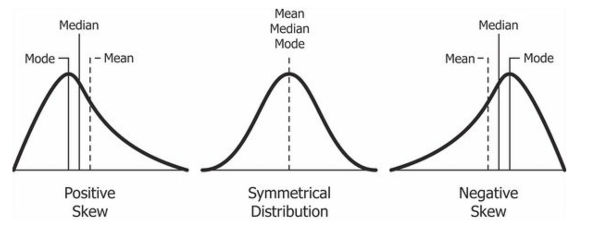
*(Sharma)

The Median is the middle value of the dataset and it is not affected by outliers.


In [17]:
numerical_column=['Critic_Score', 'Critic_Count', 'User_Count']

In [18]:
for column  in numerical_column:
    df[column].fillna(df[column].median(), inplace=True)

C:\Users\cristinap\AppData\Local\Temp\ipykernel_2592\952742017.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(df[column].median(), inplace=True)


In [19]:
df.isnull().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
Publisher            54
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score          0
Critic_Count          0
User_Score         6704
User_Count            0
Developer          6623
Rating             6769
dtype: int64

Checking the variable *" Years_of_release"* it will be noticed that it is negatively skewed. Althought instead of the median it will be filled with the mode. Due that Years of release referes to actual data filling with the mediam doesn't seems appropriate due that it is not needed to have the middle value of the data althoutd speaking of years it is more appropriate to fill with the number that most ossurs  in the dataset: the mode 

In [20]:
df['Year_of_Release'].skew()

-0.9731508298532474

In [21]:
most_frequent_year = df['Year_of_Release'].mode()[0]  
df['Year_of_Release'] = df['Year_of_Release'].fillna(most_frequent_year)  

In [22]:
df.isnull().sum()

Name                  2
Platform              0
Year_of_Release       0
Genre                 2
Publisher            54
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score          0
Critic_Count          0
User_Score         6704
User_Count            0
Developer          6623
Rating             6769
dtype: int64

**Object features missing variable:**

Due to the nature of visualization it has been avoided encode the variable to be filled after with the median the mode or the mean but it will be used "Unknown" so it will be noticed in the visualization. it has been avoided the dropna function due to the amount of missing variables.

In [23]:
df.isnull().sum()

Name                  2
Platform              0
Year_of_Release       0
Genre                 2
Publisher            54
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score          0
Critic_Count          0
User_Score         6704
User_Count            0
Developer          6623
Rating             6769
dtype: int64

**Handling missing variables in categorical features:**

when it comes to deal with categorical data normally missing variable are transformed into categorical maintaining the pattern inside the data and after handled as categorical. Due to the nature of the domain and the final aim of this that is reporting visualization and clear a concize analysis about the sales for videogames the choise do don't label encode the categorical variable has been taken.

As workaround the missing variable are filled with the value "Unknown". 

this gives the opportunity to fill the missing variable but still identify which was missing and not considered in the visualization that will be performed going on in the analysis

    


In [24]:
categorical_columns = ['Name','Genre', 'Publisher', 'Developer', 'Rating']

In [25]:
for column in categorical_columns:
    df[column].fillna('Unknown', inplace=True)

C:\Users\cristinap\AppData\Local\Temp\ipykernel_2592\3161119200.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna('Unknown', inplace=True)


**User_Score Variable**:

User Score Variable has been left last to be handled. The reason behing it wasn't incorporated with the others is that when the function .type has been done it has been noticed that it is a categorical variale althought when it is analyzed with the funcion .unique this varible appears to be numerical. 

The first challange that has been encountered is that the function .unique shows the label "tbc" inside the User_Score. Meaning that if it will be tried to be transformed to float before handling tbc it will be returned an error. To overcome this the replace function comes to help replacing "tbc" with missing values. It will change into numerical values.

Once there are numerical it can be checked if the variable is skewd and due that the result is -1.25 so it is negative skewed. For the reason listed before this will lead to take the decision to fill it with the median. 
Once the missing variable are filled it will ve changed into the type Float for a better accuracy 

In [26]:
df['User_Score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [27]:
df['User_Score'].replace('tbd', pd.NA, inplace=True)

C:\Users\cristinap\AppData\Local\Temp\ipykernel_2592\3555740662.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['User_Score'].replace('tbd', pd.NA, inplace=True)


In [28]:
df['User_Score'] = pd.to_numeric(df['User_Score'], errors='coerce')

In [29]:
df['User_Score'].skew()

-1.254614744376002

In [30]:
 df["User_Score"].fillna(df["User_Score"].median(), inplace=True)

C:\Users\cristinap\AppData\Local\Temp\ipykernel_2592\3970626930.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["User_Score"].fillna(df["User_Score"].median(), inplace=True)


In [31]:
df.isnull().sum()

Name               0
Platform           0
Year_of_Release    0
Genre              0
Publisher          0
NA_Sales           0
EU_Sales           0
JP_Sales           0
Other_Sales        0
Global_Sales       0
Critic_Score       0
Critic_Count       0
User_Score         0
User_Count         0
Developer          0
Rating             0
dtype: int64

Change Object into Float:

In [32]:
df['User_Score']=df['User_Score'].astype(float)

In [33]:
unique_user_scores = df["User_Score"].unique()
print(unique_user_scores)

[8.  7.5 8.3 8.5 6.6 8.4 8.6 7.7 6.3 7.4 8.2 9.  7.9 8.1 8.7 7.1 3.4 5.3
 4.8 3.2 8.9 6.4 7.8 2.6 7.2 9.2 7.  7.3 4.3 7.6 5.7 5.  9.1 6.5 8.8 6.9
 9.4 6.8 6.1 6.7 5.4 4.  4.9 4.5 9.3 6.2 4.2 6.  3.7 4.1 5.8 5.6 5.5 4.4
 4.6 5.9 3.9 3.1 2.9 5.2 3.3 4.7 5.1 3.5 2.5 1.9 3.  2.7 2.2 2.  9.5 2.1
 3.6 2.8 1.8 3.8 0.  1.6 9.6 2.4 1.7 1.1 0.3 1.5 0.7 1.2 2.3 0.5 1.3 0.2
 0.6 1.4 0.9 1.  9.7]


**Double checking Missing Variables if they have been filled and types:**

After handling the missing variables it is repeted the function df.isnull().sum to test if all the missing variables has been handled: 

In [34]:
df.isnull().sum()

Name               0
Platform           0
Year_of_Release    0
Genre              0
Publisher          0
NA_Sales           0
EU_Sales           0
JP_Sales           0
Other_Sales        0
Global_Sales       0
Critic_Score       0
Critic_Count       0
User_Score         0
User_Count         0
Developer          0
Rating             0
dtype: int64

In [35]:
df.head(100)

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8.0,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,71.0,21.0,7.5,24.0,Unknown,Unknown
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8.0,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,71.0,21.0,7.5,24.0,Unknown,Unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Crash Bandicoot 2: Cortex Strikes Back,PS,1997.0,Platform,Sony Computer Entertainment,3.78,2.17,1.31,0.31,7.58,71.0,21.0,7.5,24.0,Unknown,Unknown
96,Super Smash Bros. for Wii U and 3DS,3DS,2014.0,Fighting,Nintendo,3.27,1.37,2.43,0.48,7.55,71.0,21.0,7.5,24.0,Unknown,Unknown
97,Super Mario Galaxy 2,Wii,2010.0,Platform,Nintendo,3.56,2.35,0.98,0.62,7.51,97.0,87.0,9.1,1854.0,Nintendo EAD Tokyo,E
98,Super Mario Bros. 2,NES,1988.0,Platform,Nintendo,5.39,1.18,0.70,0.19,7.46,71.0,21.0,7.5,24.0,Unknown,Unknown


In [36]:
df.dtypes

Name                object
Platform            object
Year_of_Release    float64
Genre               object
Publisher           object
NA_Sales           float64
EU_Sales           float64
JP_Sales           float64
Other_Sales        float64
Global_Sales       float64
Critic_Score       float64
Critic_Count       float64
User_Score         float64
User_Count         float64
Developer           object
Rating              object
dtype: object

# Change float into Integers: 

--------------------------------------------------------------------------------------------------------

In the dataset it could be noticed that variable like Years_of_Release are float64 so they appear 2006.0 but this should be integers. For the same reason Cristic_Score, Critic_count,User_Count. 

In [37]:
df['Year_of_Release'] = df['Year_of_Release'].apply(np.int64)
df['Critic_Score'] = df['Critic_Score'].apply(np.int64)
df['Critic_Count'] = df['Critic_Count'].apply(np.int64)
df['User_Count'] = df['User_Count'].apply(np.int64)

In [38]:
df.dtypes

Name                object
Platform            object
Year_of_Release      int64
Genre               object
Publisher           object
NA_Sales           float64
EU_Sales           float64
JP_Sales           float64
Other_Sales        float64
Global_Sales       float64
Critic_Score         int64
Critic_Count         int64
User_Score         float64
User_Count           int64
Developer           object
Rating              object
dtype: object

In [39]:
df.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76,51,8.0,322,Nintendo,E
1,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,71,21,7.5,24,Unknown,Unknown
2,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82,73,8.3,709,Nintendo,E
3,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80,73,8.0,192,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,71,21,7.5,24,Unknown,Unknown


Now the EDA part has becoming to an end and it can be moved to answer question that will highlite the sales strategy.

## PART 1:

--------------------------------------------------------------------------------------------------------
--------------------------------------------------------------------------------------------------------

## What are the top 5 games by global sales?

--------------------------------------------------------------------------------------------------------

To answer which are the the top 5 games by global sales it needs to be understanded with are the top global sales. Due to the memory that the dataset takes to be handled and to have a better understanding of the Global Sales the dataset has been reduced. 

The dataset has been reduced with the Global Sales that are more than 30 with the function .loc. of the dataset it has The dataset will be reduced for the global sales that have more value than 30. The reason behind is to optimize the running of the karnel and start reducing the dataset to see the information needed

In [40]:
GlobalSales_df=df.loc[df["Global_Sales"]>30]

In [41]:
GlobalSales_df.head(5)

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76,51,8.0,322,Nintendo,E
1,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,71,21,7.5,24,Unknown,Unknown
2,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82,73,8.3,709,Nintendo,E
3,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80,73,8.0,192,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,71,21,7.5,24,Unknown,Unknown


Once the dataset has been reduced the analysis of the question to show the answer with the correct visualization is crucial. The question imply to understand the distribution of the global sales in the dataset devided. Due that it is asking about the frequency of categorical variable a barplot is the visualization chosen.

The choice of a Barplot suits to visualize the relationship between numerical and categorical variable in this case it shows the distribution of the Global Sales for games. Since "Name" is a categorical variable it has been used as Y axis meanwhile the numerical variable "Global_Sales" is the X axis.  If it was done the countrary so X "Name" and Y"Global_Sales" The visualization was still working but it won't be visually effective as the choice taken. 

By using Seaborn Barplot function and the estimator mean with the numpy library the visualization shows the avererage, mean, of global sales broken down to the Games. The statistical summary provides the insight into the sales at global level for the games resulting in give the top performer.

<function matplotlib.pyplot.show(close=None, block=None)>

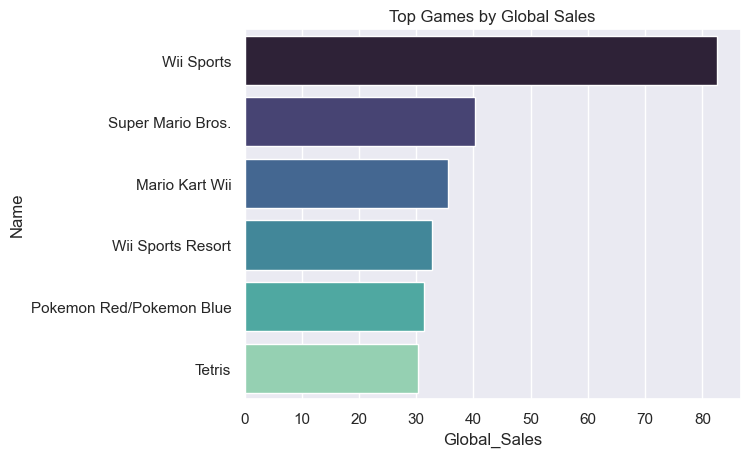

In [42]:
from numpy import mean
sns.barplot(data=GlobalSales_df, x="Global_Sales", y="Name", palette="mako", estimator=mean );
plt.title("Top Games by Global Sales")
plt.show

**Results**:

The graph shows that the top 5 games are: 

1- Wii Sports

2- Super Mario Bros

3- Mario Kart wii

4- Wii Sports Resort 

5- Pokemon Red/Pokemon Blue

# Is there a correlation between the “na_sales” and “jp_sales” for the years 2010-2014?  

--------------------------------------------------------------------------------------------------------

In order to answer this question it is important to see the meaning of correlation. Correlation is the relationship betweem two variables (in this case NA_sales and jp_sales) to determine if they tend to move in the same or opposite directions for specific years. 

To see if there is correlation the visualization chosen is a scatterplot with seaborn. 

A scatterplot uses dots to rappresent values for two different numerical variables. Each dots has a position that could coukd be on the horizontal or vertical axis indicating each data point. The position of these dots reppresent if there is correlation. For this nature it has been used for visualize the answer of the previous question.  

Due that it needs to be discovered for specific years at the beggining the years are specified and after the dataset will be filtered for the specific years.

Once the dataset has been filtered the scatterplot is created to have:

X= NA_sales
Y= JP_Sales
HUE: Years_of_release and due that has been selected the filtered dataset for the specific years will be specified as range


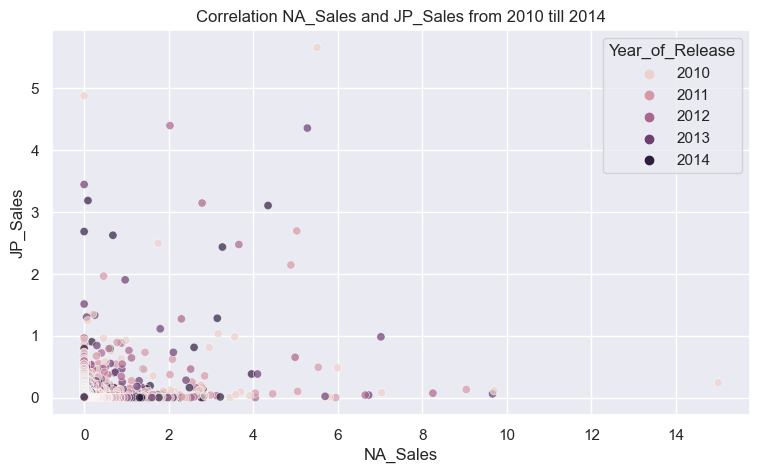

In [43]:
Specific_Years = [2010,2011,2012,2013,2014]
df_years = df[df['Year_of_Release'].isin(Specific_Years)]
plt.figure(figsize=(9,5))
plt.title("Correlation NA_Sales and JP_Sales from 2010 till 2014")
sns.scatterplot(data=df_years, x='NA_Sales', y='JP_Sales', alpha=0.7, hue='Year_of_Release');

By looking at this visualization it can be quickly understand the potential connection betweem the 2 variable for the specifici years.

**Results:** 

The graphs shows that the there is no correlaction between NA_Sales and JP_Sales in the specified years. It doesn't mean that the lack of correlation is also lack of causation but it is noticable that the graph don't show the same pattern in the values but the datapoint are scattered randomly. It shows that there are outliners ( point that are far) But don't really that are correlated.


# What is the distribution of the most popular 4 game genres?  

--------------------------------------------------------------------------------------------------------

First of all it needs to be considered which feature the question consider which is: Genres. 

It has been noticed before that the Genre is an object so it is a categorical variable. 

It asks to compare the popularity of the genre which it means the distribution. To have a visual quick results the histogram is the quick and common approach for this. An Histogram gives a clear reppresentation of the distribution in this case of the Genre to understand which are the top 4.

In [44]:
df.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76,51,8.0,322,Nintendo,E
1,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,71,21,7.5,24,Unknown,Unknown
2,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82,73,8.3,709,Nintendo,E
3,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80,73,8.0,192,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,71,21,7.5,24,Unknown,Unknown


C:\Users\cristinap\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


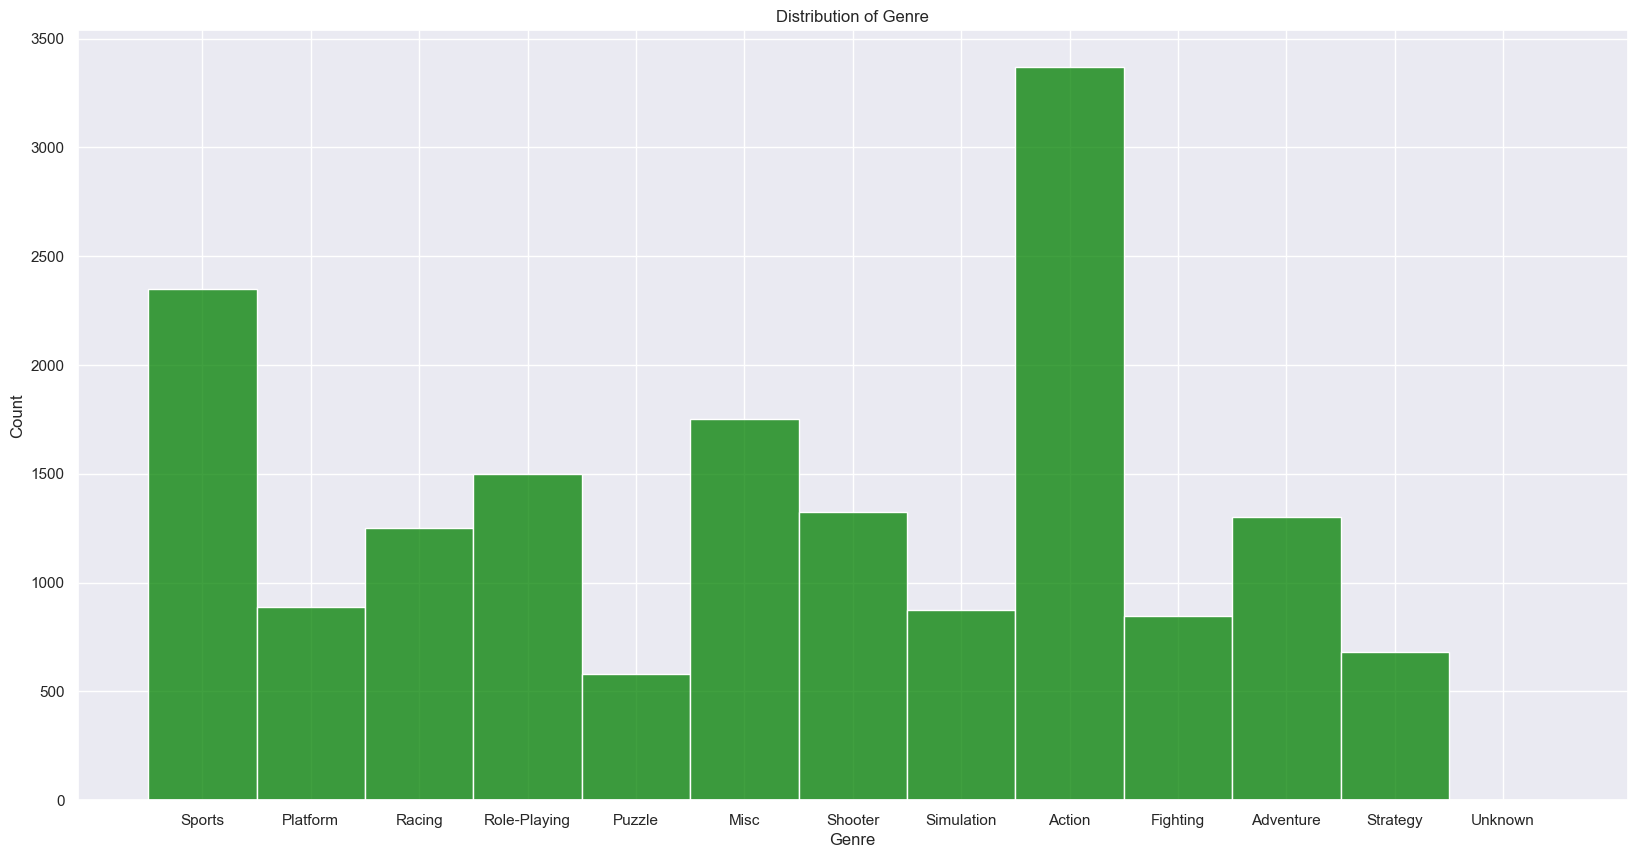

In [45]:
plt.figure(figsize=(20, 10))
sns.histplot(df["Genre"], color="green")
plt.title('Distribution of Genre')
plt.grid(True)
plt.show()

It has been used Seaborn to do the histogram where the title has been added and also the grid to understand better the visual results. The figure has been chosen 20-10 to read fully the name of the genre. If it was used 10,5 for example the labels were overlapping 

**Results:**

The histogram shows that the top 4 games genre for the dataset are:

- Actions
- Sports
- Misc
- Role Playing

                                            

# Do older games (2005 and earlier) have a higher MEAN “eu_sales” than newer games (after 2005)?  

--------------------------------------------------------------------------------------------------------

To show and obtain the mean Boxplot are the visualization that we need to use 

In [46]:
Oldergames_df=df.loc[df["Year_of_Release"]<=2005]

In [47]:
Newergames_df=df.loc[df["Year_of_Release"]>2005]

In [48]:
Oldergames_mean= Oldergames_df['EU_Sales'].mean()
Newergames_mean= Newergames_df['EU_Sales'].mean()
print(Oldergames_mean)
print(Newergames_mean)

0.1479159168984132
0.14335847633415047


For EU sales Data the means to be calculating aggregating the data by years

In [49]:
older_sales_by_year = Oldergames_df.groupby('Year_of_Release')['EU_Sales'].mean().reset_index()
newer_sales_by_year = Newergames_df.groupby('Year_of_Release')['EU_Sales'].mean().reset_index()

C:\Users\cristinap\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


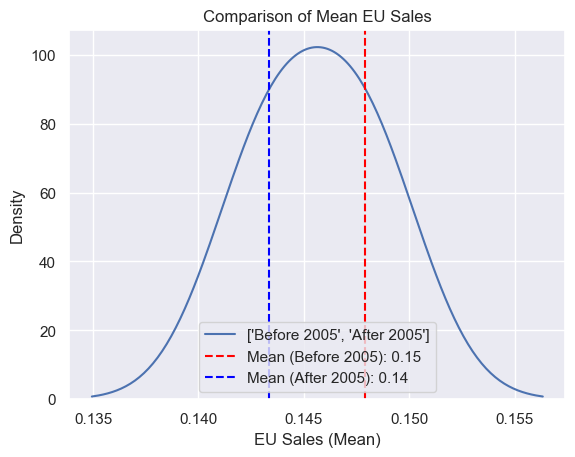

In [53]:

data = [Oldergames_mean, Newergames_mean]
labels = ['Before 2005', 'After 2005']
sns.kdeplot(data=data, label=labels)
plt.axvline(x=Oldergames_mean, color='red', linestyle='dashed', label=f'Mean (Before 2005): {Oldergames_mean:.2f}')
plt.axvline(x=Newergames_mean, color='blue', linestyle='dashed', label=f'Mean (After 2005): {Newergames_mean:.2f}')
plt.xlabel('EU Sales (Mean)')
plt.ylabel('Density')
plt.title('Comparison of Mean EU Sales')
plt.legend()
plt.show()

# What are the 3 most common “developer” in the dataset?  

--------------------------------------------------------------------------------------------------------

In [ ]:
df["Developer"].unique

In [ ]:
developer_counts = df["Developer"].value_counts().sort_values(ascending=False)
print(developer_counts)

In [ ]:
most_common_developers = df[df["Developer"].isin(developer_counts[developer_counts <1000].index)]

In [ ]:
Developer_counts = most_common_developers['Developer'].value_counts().nlargest(3)
top_Developer_counts = Developer_counts.index.to_list()
top_Developer_counts

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(x=top_Developer_counts, y=Developer_counts.values, palette='rocket')
plt.title('Top 3 Developers in Dataset')
plt.xlabel('Developer')
plt.ylabel('Count')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

# Part 2: 

--------------------------------------------------------------------------------------------------------
--------------------------------------------------------------------------------------------------------

From where was the most amount of sales? EU_Sales? NA_Sales or JP_Sales on Global Sales? 

In [ ]:
total_eu_sales = df["EU_Sales"].sum()
total_na_sales = df["NA_Sales"].sum()
total_jp_sales = df["JP_Sales"].sum()
total_other_sales=df["Other_Sales"].sum()
print(f"Total EU Sales: {total_eu_sales}")
print(f"Total NA Sales: {total_na_sales}")
print(f"Total JP Sales: {total_jp_sales}")
print(f"Total other sales: {total_other_sales}")

In [ ]:
sales_data = pd.DataFrame({
    'Region': ['EU', 'NA', 'JP', 'Other'],
    'Total Sales': [total_eu_sales, total_na_sales, total_jp_sales, total_other_sales]
})

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(data=sales_data, x='Region', y='Total Sales')
plt.xlabel('Region')
plt.ylabel('Total Sales')
plt.title("Sales by Region")
plt.legend(labels=['EU:European','NA: North America', 'JP:Japan',"other: Other Countries not included before"], loc='upper right')
plt.show()

lineplot?

In [ ]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=sales_data, x='Region', y='Total Sales')
plt.xlabel('Region')
plt.ylabel('Total Sales')
plt.title("Sales by Region")
plt.legend(labels=['EU:European','NA: North America', 'JP:Japan',"other: Other Countries not included before"], loc='upper right')
plt.show()

Does some genre have better sales in a specific region? 

In [ ]:
genre_sales = df.groupby('Genre')[['EU_Sales', 'NA_Sales', 'JP_Sales', 'Other_Sales']].sum().reset_index()

# Melt the DataFrame to have 'Genre' as a column and 'Region' as another column
genre_sales_melted = genre_sales.melt(id_vars='Genre', var_name='Region', value_name='Total_Sales')

# Create a grouped bar plot
plt.figure(figsize=(12, 6))
sns.barplot(data=genre_sales_melted, x='Genre', y='Total_Sales', hue='Region', palette='viridis')
plt.xlabel('Genre')
plt.ylabel('Total Sales')
plt.title('Total Sales of Each Genre in Each Region')
plt.legend(title='Region', loc='upper right')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

what is the distribution of age rating into the global sales? 

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Rating', y='Global_Sales')
plt.xlabel('Age Rating')
plt.ylabel('Global Sales')
plt.title('Distribution of Age Ratings in Relation to Global Sales')
plt.show()

What is the most common Publisher? 

In [ ]:
df["Publisher"].unique

In [ ]:
publisher_counts = df["Publisher"].value_counts().sort_values(ascending=False)
print(publisher_counts)

In [ ]:
most_common_publisher= df[df["Publisher"].isin(publisher_counts[publisher_counts > 900].index)]

In [ ]:
plt.figure(figsize=(30, 15))
sns.displot(most_common_publisher["Publisher"]);
plt.title('Most Commun Publisher in dataset')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

what are the games that have the highest rate? 

In [ ]:
unique_user_scores = df["User_Score"].unique()
print(unique_user_scores)

In [ ]:
from numpy import mean
sns.barplot(data=df, x="Genre", y="User_Score", color="green", estimator=mean );
plt.title("Top Genre by User Score")
plt.xticks(rotation=45)
plt.show

# References: 

- Chia, Austin . “How to Make a Seaborn Histogram: A Detailed Guide.” Https://Www.datacamp.com/Tutorial/How-To-Make-a-Seaborn-Histogram, Austin Chia , Jan. 2024, www.datacamp.com/tutorial/how-to-make-a-seaborn-histogram. Accessed 24 Mar. 2024.
- “How to Sum Columns with a Duplicate Name with Pandas?” Stack Overflow, stackoverflow.com/questions/61161241/how-to-sum-columns-with-a-duplicate-name-with-pandas. Accessed 24 Mar. 2024. 
- “Seaborn.barplot — Seaborn 0.11.1 Documentation.” Seaborn.pydata.org, seaborn.pydata.org/generated/seaborn.barplot.html.
- “Matplotlib.pyplot.legend — Matplotlib 3.3.4 Documentation.” Matplotlib.org, matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.legend.html.
- “Pandas.DataFrame.shape — Pandas 2.2.1 Documentation.” Pandas.pydata.org, pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.shape.html#pandas.DataFrame.shape. Accessed 24 Mar. 2024.
-  “How to Do Arrows in Markdown.” Reimbar.org, 7 Aug. 2019, reimbar.org/dev/arrows/.
-  “How to Do Arrows in Markdown.” Reimbar.org, 7 Aug. 2019, reimbar.org/dev/arrows/.
-  Sharma, Abhishek. “What Is Skewness in Statistics? | Statistics for Data Science.” Analytics Vidhya, 5 July 2020, www.analyticsvidhya.com/blog/2020/07/what-is-skewness-statistics/.
-  Firdose, Tahera. “Filling Missing Values with Mean and Median.” Medium, 29 May 2023, tahera-firdose.medium.com/filling-missing-values-with-mean-and-median-76635d55c1bc.
-  “Pandas.DataFrame.fillna — Pandas 1.4.1 Documentation.” Pandas.pydata.org, pandas.pydata.org/docs/reference/api/pandas.DataFrame.fillna.html.
-  “Pandas.DataFrame.replace — Pandas 1.1.4 Documentation.” Pandas.pydata.org, pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.replace.html.
-  “Bar Plots in Python | Beginner’s Guide to Data Visualization Using Bar Plots.” Analytics Vidhya, 8 Aug. 2021, www.analyticsvidhya.com/blog/2021/08/understanding-bar-plots-in-python-beginners-guide-to-data-visualization/
-  seaborn. “Choosing Color Palettes — Seaborn 0.9.0 Documentation.” Pydata.org, 2013, seaborn.pydata.org/tutorial/color_palettes.html.
- Holtz, Yan. “Barplot.” The Python Graph Gallery, python-graph-gallery.com/barplot/. Accessed 2 Apr. 2024.
- Atlassian. “Mastering Scatter Plots: Visualize Data Correlations.” Atlassian, www.atlassian.com/data/charts/what-is-a-scatter-plot#:~:text=What%20is%20a%20scatter%20plot.
- Mindrila, Diana, and Phoebe Balentyne. Scatterplots and Correlation. 2017.
-“Visualizing Distributions of Data — Seaborn 0.13.2 Documentation.” Seaborn.pydata.org, seaborn.pydata.org/tutorial/distributions.html#plotting-univariate-histograms. Accessed 4 Apr. 2024.
--

